In [2]:
import pandas as pd
import re 
import os
import numpy as np
from tqdm.notebook import tqdm
import nltk
words = set(nltk.corpus.words.words())

In [15]:
data=pd.read_csv("/home/tarushi/Desktop/data_anecdotes/Projects/COVID19/Data/DecTweets")
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location
0,2020-12-28 20:51:17,1343660816457981953,One of my friends thinks that corona is just a...,Twitter for Android,0,0,Slovenia
1,2020-12-28 20:51:15,1343660809784872968,Nancy Pelosi virus.....more dangerous to Ameri...,Twitter Web App,0,0,South Texas
2,2020-12-28 20:51:07,1343660774309421062,@garak_ho_jayein Thanks to Corona\n I'm intact 😂,Twitter for Android,0,0,Pakistan
3,2020-12-28 20:50:57,1343660731355557893,@trustedstar1 @Sparks80079110 @RodneyEvans He ...,Twitter for iPhone,0,0,Clear Fork
4,2020-12-28 20:50:49,1343660698824564745,"Conspiracy theory? 1984??\nNo, it's real!!\nGE...",Twitter for iPhone,0,0,NaN


In [16]:
def check_null(name):
    for i in name.columns:
        print(i,":",name[str(i)].isna().sum())
check_null(data)

Date : 0
User Id : 0
Tweet : 0
Tweet Source : 21
Retweets : 0
Likes : 0
Location : 14977


In [19]:
data.replace(np.nan,"Not Found",inplace=True)

In [20]:
check_null(data)

Date : 0
User Id : 0
Tweet : 0
Tweet Source : 0
Retweets : 0
Likes : 0
Location : 0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46371 entries, 0 to 46370
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          46371 non-null  object
 1   User Id       46371 non-null  int64 
 2   Tweet         46371 non-null  object
 3   Tweet Source  46371 non-null  object
 4   Retweets      46371 non-null  int64 
 5   Likes         46371 non-null  int64 
 6   Location      46371 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.5+ MB


In [22]:
data['Date']=pd.to_datetime(data['Date'])
data['Date'].dtypes

dtype('<M8[ns]')

In [25]:
data['Tweet'][3]

'@trustedstar1 @Sparks80079110 @RodneyEvans He didn’t want to be identified!!  Or did they have the corona?'

In [43]:
def clean_txt(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    res=re.sub(r'[^\w\s]', '', input_txt.lower())
    res=re.sub('\s+',' ',res)
    res=''.join(i for i in res if not i.isdigit())
    res=' '.join([i for i in res.split() if len(i)>2])
    return res
clean_txt(data['Tweet'][3],"@[\w]*")

'didnt want identified did they have the corona'

In [44]:
data['Tweet']=np.vectorize(clean_txt)(data['Tweet'], "@[\w]*")
data.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location
0,2020-12-28 20:51:17,1343660816457981953,one friends thinks that corona just flu httpst...,Twitter for Android,0,0,Slovenia
1,2020-12-28 20:51:15,1343660809784872968,nancy pelosi virusmore dangerous americans tha...,Twitter Web App,0,0,South Texas
2,2020-12-28 20:51:07,1343660774309421062,thanks corona intact,Twitter for Android,0,0,Pakistan
3,2020-12-28 20:50:57,1343660731355557893,didnt want identified did they have the corona,Twitter for iPhone,0,0,Clear Fork
4,2020-12-28 20:50:49,1343660698824564745,conspiracy theory its real germany bundeswehr ...,Twitter for iPhone,0,0,Not Found


In [45]:
all_tokens=[row['Tweet'].split() for _,row in data.iterrows() ]
from nltk.stem.porter import *
stemmer = PorterStemmer()
for i in range(len(all_tokens)):
    for j in all_tokens[i]:
        j=stemmer.stem(j)
    all_tokens[i]=' '.join(all_tokens[i])
data['Tweet']=all_tokens

In [46]:
data.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location
0,2020-12-28 20:51:17,1343660816457981953,one friends thinks that corona just flu httpst...,Twitter for Android,0,0,Slovenia
1,2020-12-28 20:51:15,1343660809784872968,nancy pelosi virusmore dangerous americans tha...,Twitter Web App,0,0,South Texas
2,2020-12-28 20:51:07,1343660774309421062,thanks corona intact,Twitter for Android,0,0,Pakistan
3,2020-12-28 20:50:57,1343660731355557893,didnt want identified did they have the corona,Twitter for iPhone,0,0,Clear Fork
4,2020-12-28 20:50:49,1343660698824564745,conspiracy theory its real germany bundeswehr ...,Twitter for iPhone,0,0,Not Found


<h2> Data Analysis </h2>

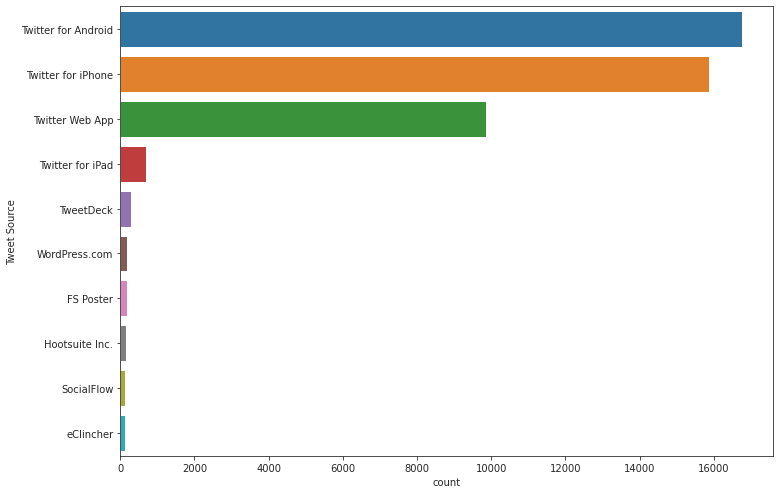

In [61]:
from matplotlib.pyplot import figure
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(y="Tweet Source",  data=data,order=data['Tweet Source'].value_counts().iloc[:10].index)
plt.show()

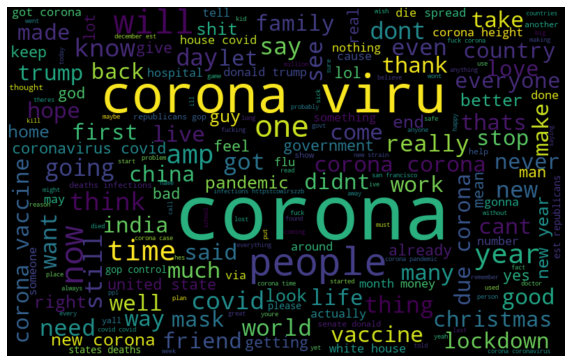

In [47]:
wcloud=' '.join([i for i in data['Tweet']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(wcloud)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h2> Assigning Scores </h2>

In [68]:
from joblib import load
clf=load("../MarchApril/Models/DTreeBOW65.joblib")

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['Tweet'])
y=clf.predict(bow)

In [110]:
from textblob import TextBlob
def get_scores(text):
    txt=TextBlob(text)
    return txt.sentiment.polarity

In [111]:
get_scores("hello")

0.0

In [118]:
ss=[get_scores(row['Tweet']) for _,row in data.iterrows()]
tscores=[]
for i in ss:
    if(i>0):
        tscores.append("Positive")
    elif(i<0):
        tscores.append("Negative")
    elif(i==0):
        tscores.append("Neutral")
data['SSTextBlob']=tscores

In [119]:
data.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location,SS,SSTextBlob
0,2020-12-28 20:51:17,1343660816457981953,one friends thinks that corona just flu httpst...,Twitter for Android,0,0,Slovenia,0,Neutral
1,2020-12-28 20:51:15,1343660809784872968,nancy pelosi virusmore dangerous americans tha...,Twitter Web App,0,0,South Texas,0,Negative
2,2020-12-28 20:51:07,1343660774309421062,thanks corona intact,Twitter for Android,0,0,Pakistan,0,Positive
3,2020-12-28 20:50:57,1343660731355557893,didnt want identified did they have the corona,Twitter for iPhone,0,0,Clear Fork,2,Neutral
4,2020-12-28 20:50:49,1343660698824564745,conspiracy theory its real germany bundeswehr ...,Twitter for iPhone,0,0,Not Found,1,Positive


<h2> Sentiment Analysis </h2>

<AxesSubplot:xlabel='SSTextBlob', ylabel='count'>

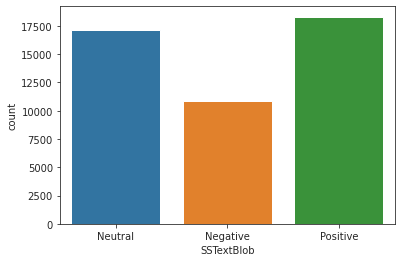

In [120]:
sns.countplot(data['SSTextBlob'])

<AxesSubplot:xlabel='SS', ylabel='count'>

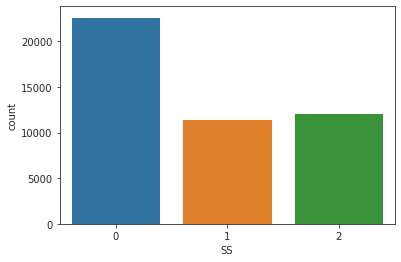

In [78]:
sns.countplot(data['SS'])

In [121]:
pos=[]
neg=[]
neu=[]
for _,row in data.iterrows():
    if(row['SSTextBlob']=="Positive"):
        pos.append(row['Tweet'])
    elif(row['SSTextBlob']=="Neutral"):
        neu.append(row['Tweet'])
    elif(row['SSTextBlob']=="Negative"):
        neg.append(row['Tweet'])

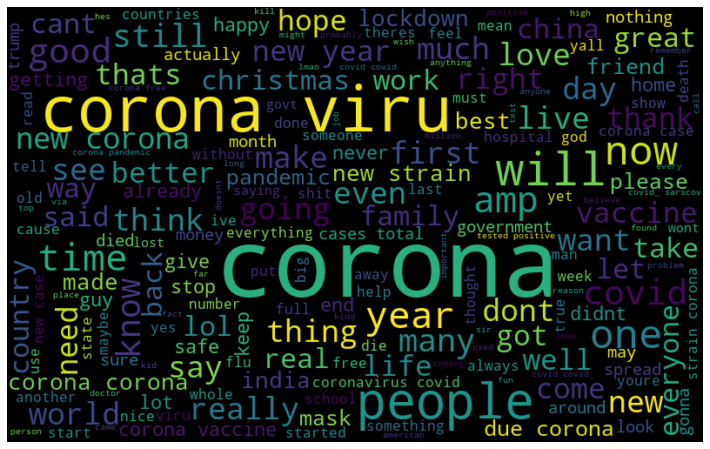

In [128]:
poscloud=' '.join([i for i in pos])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(poscloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

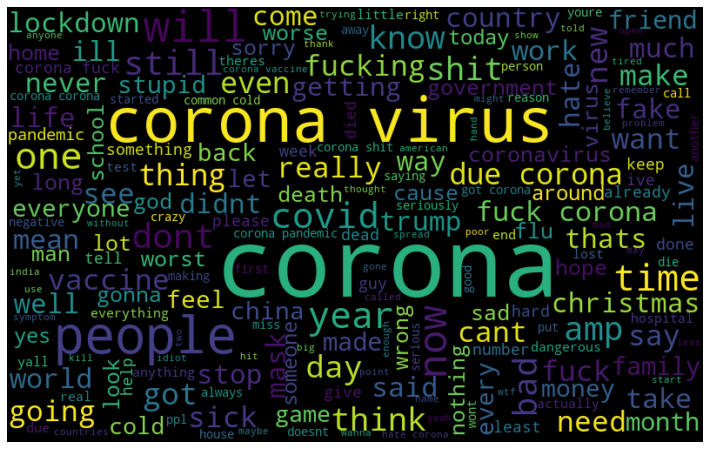

In [129]:
negcloud=' '.join([i for i in neg])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negcloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

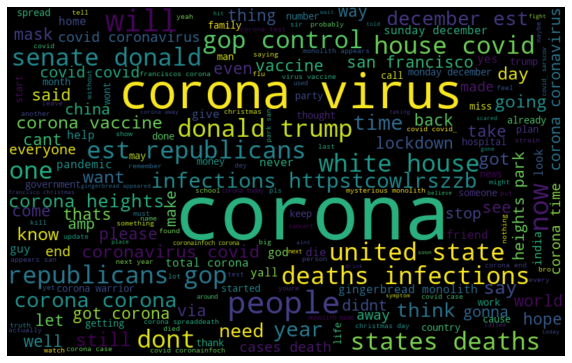

In [124]:
neucloud=' '.join([i for i in neu])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neucloud)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [125]:
data['Date'].dt.date

0        2020-12-28
1        2020-12-28
2        2020-12-28
3        2020-12-28
4        2020-12-28
            ...    
46366    2020-12-25
46367    2020-12-25
46368    2020-12-25
46369    2020-12-25
46370    2020-12-25
Name: Date, Length: 46371, dtype: object

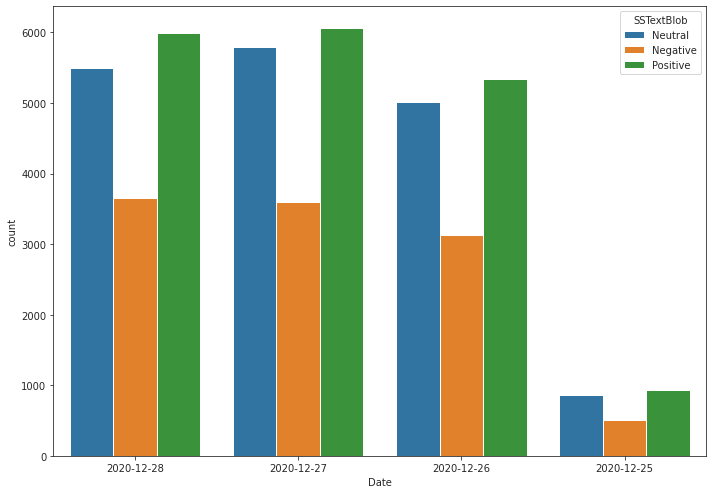

In [127]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(data['Date'].dt.date,hue=data['SSTextBlob'])
plt.show()